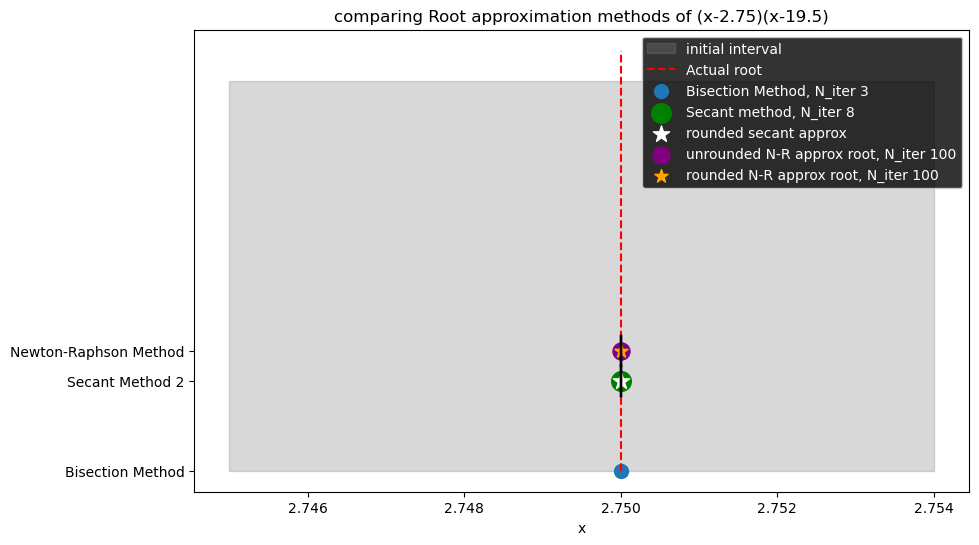

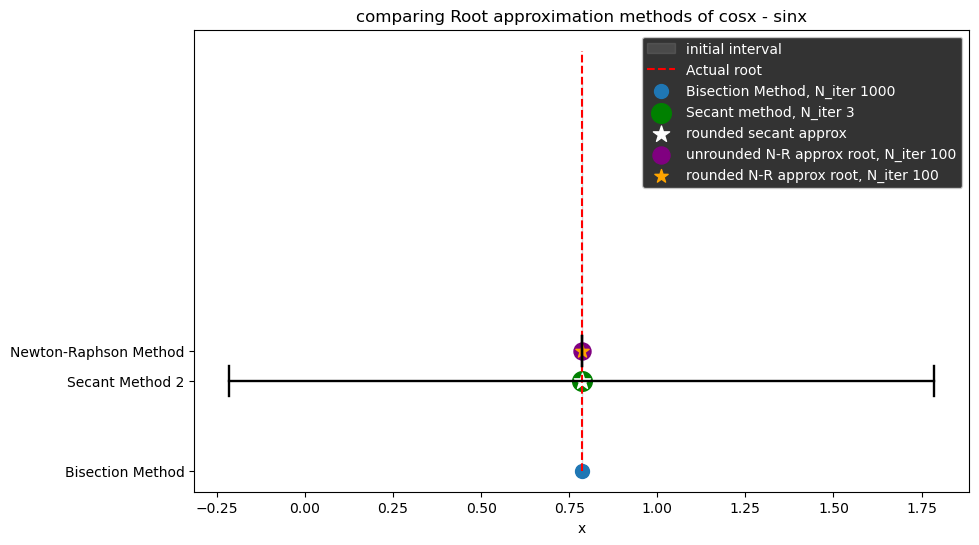

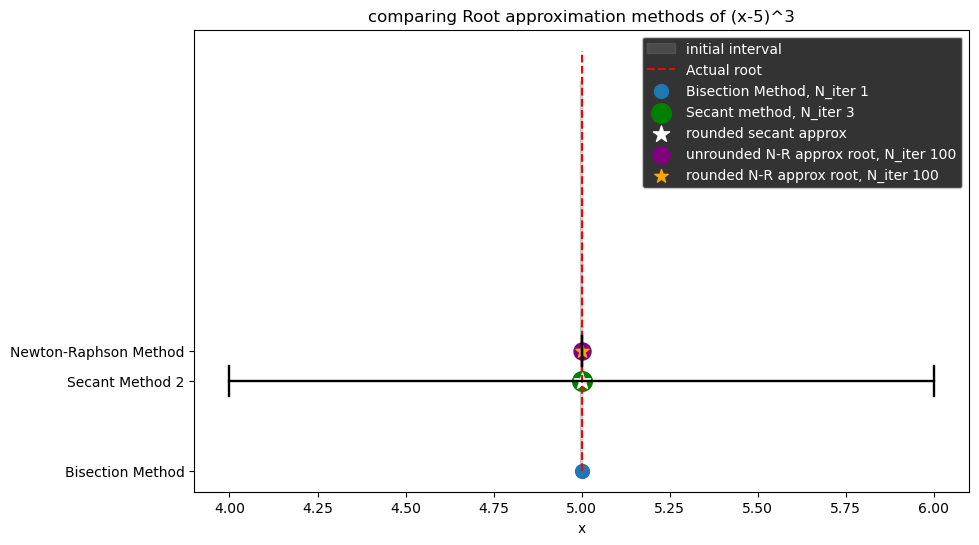

In [1]:
# import libraries:
import numpy as np
import matplotlib.pyplot as plt

# Defining the functions that thier roots are to be approximatted:
# Hyperbolic function:
def hyp_func(x):
    return (x-2.75)*(x+7)

# Polynomial function:
def poly_func(x):
    return (x-5)**3

# sine plus cosine function:
def trig_func(x):
    return (np.cos(x) - np.sin(x))

# Derivative of the above function for Newton-Raphson method:
# Derivative of hyperbolic function:
def div_hyp(x):
    return 2*x + 4.5

# Derivative of polynomial function:
def div_poly(x):
    return 3*(x-5)**2

# Derivative of polynomial function:
def div_trig(x):
    return np.sin(-x) - np.cos(x)

# Defining Bisection Approximation Method: 
def bisection(f, a, b):
    if f(a) * f(b) > 0: #hhhhhhhhhhhhhhhhhhhhhhhh
        #end function, no root.
        print("No root found.")
        return None, None
    else:
        iterations = 1  # Initialize to 1 to account for the case where loop doesn't run
        while b != a and iterations < 1000:
            x_mid = (a + b) / 2.0
            if f(x_mid) == 0:
                return x_mid, iterations  # The midpoint is the x-intercept/root.
            elif f(a) * f(x_mid) < 0:  # Increasing but below 0 case
                b = x_mid
            else:
                a = x_mid
            iterations += 1

        return x_mid, iterations
    

# Defining Secant root Approximation Method:
def secant(f, x1, x2):
    # Initial Error to enter into the loop
    error = 1

    # Setting iteration counter
    count = 1
    error = []
    # Integration starts
    while x1 != x2:  # Update loop condition
        # Evaluating new value of x based on old
        xn = x1 - ((x2 - x1) / (f(x2) - f(x1))) * f(x1)

        # Evaluating error
        error.append(abs(x2 - xn))

        # Setting x's for next iteration
        x1 = x2
        x2 = xn

        # Incrementing loop counter
        count += 1

    return xn, count, error[-2]  


# Newton-Raphson approximation function method:
def Newton_Raphson(f, div_f, init_guess, max_iterations=100):
    # Setting initial error and loop counter
    count = 1
    errors = []  # Storing errors
    # Starting iterations
    xn = init_guess - f(init_guess) / div_f(init_guess)
    while xn != init_guess and count < max_iterations:
        xn_new = xn - f(xn) / div_f(xn)
        error = abs(xn_new - xn)
        xn = xn_new
        count += 1
        errors.append(error)  # Append error to list
    # Return root, number of iterations, and list of errors
    return xn, count, errors    
#===============================================NUMERICAL APPROXIMATION MODELS=================================================================
# Constructing functions  for the three numerical approximation methods:

def root_approx_methods(f,div_f, x1,x2, actual_root, upper_bound, lower_bound, relation, decimal):
    
    
    # accessing approximated root and number of iterations
    B_root, B_iterations = bisection(f,x1,x2)
    
   
    y = np.arange(0, 30, 2)
    
    
    plt.figure(figsize=(10, 6))
    plt.plot([], []), 
    plot = [ 
    plt.fill_between([lower_bound, upper_bound], y[0], y[-2], alpha=0.3, color='gray', label=(f'initial interval')),
    plt.vlines(actual_root, 0, y[-1], color = "red", linestyle = "--", label = "Actual root"),
    plt.scatter(B_root, y[0], label = (f"Bisection Method, N_iter {B_iterations}"), s = 100),
    plt.xlabel("x"),
    #plt.ylabel("N_iterations"),
    plt.title(f"comparing Root approximation methods of {relation}")
   
]
    
    
        
    # accessing approximated root and number of iterations   
    s_root, s_iterations, s_error = secant(f, x1, x2)
   

      # Defining the interval for secant approximated root (final interval):
    x_start_secant, x_end_secant = s_root - s_error, s_root + s_error
    y_start_secant = 6 # only y point is needed
    # Rounded root:
   # s_rounded_root = (x_start_secant + x_end_secant)/2
    #ploting for Secant root approx method:
    plot.append(plt.scatter(s_root, y_start_secant, color = "green", label = (f"Secant method, N_iter {s_iterations}"), s = 200))

    #ploting for rouded Secant approx root:
    plot.append(plt.scatter(round(s_root, decimal), y_start_secant, color = "white", label = (f"rounded secant approx"), marker ="*", s = 150))
                
    # Ploting  a line connedting the two interval points and bars at start and end points:
    plt.plot([x_start_secant, x_end_secant], [y_start_secant, y_start_secant], 'k-', linewidth=1.7)  # Line connecting the interval points
    plt.plot([x_start_secant, x_start_secant], [y_start_secant - 1, y_start_secant + 1], 'k-', linewidth=1.7)  # Bar at the start point
    plt.plot([x_end_secant, x_end_secant], [y_start_secant - 1, y_start_secant + 1], 'k-', linewidth=1.7)  # Bar at the end point
    
        
    
    # accessing approximated root and number of iterations
    N_root, N_iterations, N_error = Newton_Raphson(f, div_f, x1)
    
    
    # Defining final interval for Newton-Raphson approx Method:
    x_start_Newton, x_end_Newton = N_root - N_error[-1], N_root + N_error[-1]

    # Rounded N-R root:
    
    # ploting unrounded root:
    plt.scatter(N_root, y[4], color = "purple", label = (f"unrounded N-R approx root, N_iter {N_iterations}"), s = 150)
    plt.scatter(round(N_root, decimal), y[4], color = "orange", label = (f"rounded N-R approx root, N_iter {N_iterations}"), marker = "*", s = 100)
    # Ploting  a line connedting the two interval points and bars at start and end points:
    plt.plot([x_start_Newton, x_end_Newton], [y[4], y[4]], 'k-', linewidth=1.7)  # Line connecting the interval points
    plt.plot([x_start_Newton, x_start_Newton], [y[4] - 1, y[4] + 1], 'k-', linewidth=1.7)  # Bar at the start point
    plt.plot([x_end_Newton, x_end_Newton], [y[4] - 1, y[4] + 1], 'k-', linewidth=1.7)  # Bar at the end point

    plt.yticks([y[0], y_start_secant, y[4]], ['Bisection Method', 'Secant Method 2', 'Newton-Raphson Method'])

  
    # Add legend with a colored box
    legend = plt.legend(facecolor='black', edgecolor='lightgrey')  # Customize legend box background color and edge color
    plt.setp(legend.get_texts(), color='white')
    
     # Loop through plots and save each with a unique filename
 #    for i, plot in enumerate([Relation_1_plot, Relation_2_plot, Relation_3_plot], start=1):
    #     plt.savefig(f"tut_{i} (mkfman002).png")  # Save each plot with a unique filename
    plt.show()  # Show the plot

    return plot

# printing out the plots for each relation:
Relation_1_plot = root_approx_methods(hyp_func, div_hyp, 1, 3, 2.75, 2.745, 2.754, "(x-2.75)(x-19.5)", 2)
Relation_2_plot = root_approx_methods(trig_func, div_trig, (np.pi/4) - 1, (np.pi/4) + 1, 0.78540, 0.785395, 0.785404, "cosx - sinx", 5)
Relation_3_plot = root_approx_methods(poly_func,div_poly, 4.000, 6.000, 5.000, 4.995, 5.0004, "(x-5)^3", 3)